In [75]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [76]:
trainSet = pd.read_csv('data/Train.csv') # load training set from CSV file
testSet = pd.read_csv('data/Test.csv') # load testing set from CSV file
combinedSet = pd.concat([trainSet, testSet], ignore_index=True) # combine the 2 sets so that the data samples can be shuffled and split randomly
combinedSet

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,19.5000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2515,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2516,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2517,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [77]:
standardizedSet = pd.DataFrame(StandardScaler().fit_transform(combinedSet.iloc[:,:3]),columns=combinedSet.columns[:3]) # use StandardScaler to standardize features by removing the mean and scaling to unit variance
combinedSet = pd.concat([standardizedSet, combinedSet.iloc[:,3:]], axis=1) #add standardized set to combined dataset
combinedSet

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.824582,0.238785,-0.402720,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,-0.590086,-0.343550,0.147762,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,0.806899,0.163157,-0.421048,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,-0.236419,-0.668751,-0.532245,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,-0.731553,0.798432,3.461449,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-0.926070,-0.963700,-0.316370,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2515,-0.926070,-0.963700,-0.316370,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2516,-0.731553,-0.207420,1.068816,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2517,-0.395569,-0.305736,-0.135315,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [78]:
trainSet = combinedSet[:trainSet.shape[0]] # grab columns that are needed for the training removes NaN class samples
dataset = trainSet 
dataset

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.824582,0.238785,-0.402720,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,-0.590086,-0.343550,0.147762,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,0.806899,0.163157,-0.421048,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,-0.236419,-0.668751,-0.532245,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,-0.731553,0.798432,3.461449,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.926070,-0.963700,-0.316370,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1759,-0.236419,0.541297,0.331256,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1760,0.753849,0.677427,-0.257911,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1761,-0.660820,-0.358676,0.344748,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [79]:
def splitSamples(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1) # use train_test_split to split dataset samples to training and testing sets
    return x_train, x_test, y_train, y_test

x = dataset.drop('Class',axis=1) # set everything except for the class as the inputs
y = dataset.Class # set class as the outputs
x_train, x_test, y_train, y_test = splitSamples(x, y) # apply split function

In [80]:
model = KNeighborsClassifier(n_neighbors = 50, weights = 'distance', algorithm = 'kd_tree', leaf_size = 40)  # define KNN model with weight and algorithm change set leaf size to 40
model.fit(x_train, y_train) # train the model with the training inputs

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, n_neighbors=50,
                     weights='distance')

Training Set



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Training Set Accuracy Score:  0.9950
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1294
         1.0       1.00      0.94      0.97       116

    accuracy                           1.00      1410
   macro avg       1.00      0.97      0.98      1410
weighted avg       1.00      1.00      0.99      1410



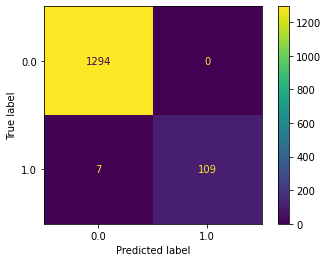

In [81]:
print('Training Set')
y_pred = model.predict(x_train) # predict with training set
print('')
plot_confusion_matrix(model, x_train, y_train) # plot the confusion matrix
print('')
print('Training Set Accuracy Score:  %.4f' %  model.score(x_train, y_train)) # get accuracy score
print(classification_report(y_train, y_pred)) # generate classification repot to get evaluation metrics

Test Set



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Test Set Accuracy Score:  0.9178
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       326
         1.0       0.25      0.04      0.06        27

    accuracy                           0.92       353
   macro avg       0.59      0.51      0.51       353
weighted avg       0.87      0.92      0.89       353



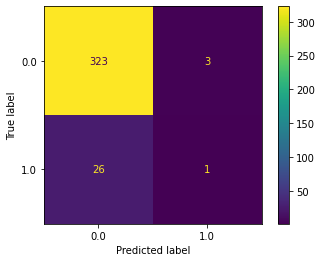

In [82]:
print('Test Set')
y_pred = model.predict(x_test) # predict with test set
print('')
plot_confusion_matrix(model, x_test, y_test) # plot the confusion matrix
print('')
print('Test Set Accuracy Score:  %.4f'%  model.score(x_test, y_test)) # get accuracy score
print(classification_report(y_test, y_pred)) # generate classification repot to get evaluation metrics